
# Project: Investigate a TMDB Movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I am going to work on dataset that contains data about movies, and I am going to see if there is a relation between certain properties and the profit of a movie.

We are going to see what kind of movie has the highest profit?
Does making a movie with high budget means that this movie will get high profit? 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling


In [66]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

First let's drop duplicates.

In [68]:
df.drop_duplicates(inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

I am going to remove id, imdb_id, original_title, cast, homepage, director, tagline, 
overview, keywords, production_companies, release year, genres,	release_date, and vote_count cause I will not e using them in my analysis.

In [70]:
df.drop(['id', 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'overview', 'keywords', 'production_companies', 'release_year', 'vote_count', 'release_date', 'genres', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [71]:
df.head()

popularity     budget     revenue  runtime  vote_average
0   32.985763  150000000  1513528810      124           6.5
1   28.419936  150000000   378436354      120           7.1
2   13.112507  110000000   295238201      119           6.3
3   11.173104  200000000  2068178225      136           7.5
4    9.335014  190000000  1506249360      137           7.3

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10865 non-null  float64
 1   budget        10865 non-null  int64  
 2   revenue       10865 non-null  int64  
 3   runtime       10865 non-null  int64  
 4   vote_average  10865 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 509.3 KB


I am going to drop the rows with the value zero in the budget column or the revenue column because they are not useful.

In [73]:
df.drop(df[df['budget'] == 0].index, inplace = True)
df.drop(df[df['revenue'] == 0].index, inplace = True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    3854 non-null   float64
 1   budget        3854 non-null   int64  
 2   revenue       3854 non-null   int64  
 3   runtime       3854 non-null   int64  
 4   vote_average  3854 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 180.7 KB


In [75]:
df.describe()

popularity        budget       revenue      runtime  vote_average
count  3854.000000  3.854000e+03  3.854000e+03  3854.000000   3854.000000
mean      1.191554  3.720370e+07  1.076866e+08   109.220291      6.168163
std       1.475162  4.220822e+07  1.765393e+08    19.922820      0.794920
min       0.001117  1.000000e+00  2.000000e+00    15.000000      2.200000
25%       0.462368  1.000000e+07  1.360003e+07    95.000000      5.700000
50%       0.797511  2.400000e+07  4.480000e+07   106.000000      6.200000
75%       1.368324  5.000000e+07  1.242125e+08   119.000000      6.700000
max      32.985763  4.250000e+08  2.781506e+09   338.000000      8.400000

I am going to calculate the profit as a percentage, so i will use one of the budget / revenue columns and will drop
the adj ones

I am going to calculate it as revenue / budget percentage and i thinnk it is a better way to measure the profit.

In [76]:
df['p_revenue'] = (((df.revenue / df.budget)-1)*100)
df.head(1000)

popularity     budget     revenue  runtime  vote_average   p_revenue
0      32.985763  150000000  1513528810      124           6.5  909.019207
1      28.419936  150000000   378436354      120           7.1  152.290903
2      13.112507  110000000   295238201      119           6.3  168.398365
3      11.173104  200000000  2068178225      136           7.5  934.089113
4       9.335014  190000000  1506249360      137           7.3  692.762821
...          ...        ...         ...      ...           ...         ...
2945    1.043504   55000000   113020255      141           7.1  105.491373
2946    1.019335   90000000   162839667       95           6.2   80.932963
2947    1.013770   12000000    43493123      107           6.0  262.442692
2953    0.956840   20000000    65569869      109           6.2  227.849345
2954    0.951793    9000000    32973937       89           6.4  266.377078

[1000 rows x 6 columns]

In [77]:
df.describe().p_revenue

count    3.854000e+03
mean     2.970412e+04
std      1.644256e+06
min     -9.999998e+01
25%     -1.234118e+01
50%      1.119690e+02
75%      3.210444e+02
max      1.018618e+08
Name: p_revenue, dtype: float64

I am going to divide based on the profit to four catogories:

- loss
- slight profit
- very good profit
- high profit

In [78]:
rev_edges = [-99,  0, 111.97 , 321, 101861900]

In [79]:
rev_names = ['loss', 'slight_profit', 'good_profit', 'high_profit' ]

In [80]:
df['profit'] = pd.cut(df['p_revenue'], rev_edges, labels=rev_names)
df.head()

popularity     budget     revenue  runtime  vote_average   p_revenue  \
0   32.985763  150000000  1513528810      124           6.5  909.019207   
1   28.419936  150000000   378436354      120           7.1  152.290903   
2   13.112507  110000000   295238201      119           6.3  168.398365   
3   11.173104  200000000  2068178225      136           7.5  934.089113   
4    9.335014  190000000  1506249360      137           7.3  692.762821   

        profit  
0  high_profit  
1  good_profit  
2  good_profit  
3  high_profit  
4  high_profit

In [81]:
df.describe().runtime

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

I am going to divide based on the runtime length to three catogories:

- short movie
- medium movie
- long movie

In [82]:
bin_edges = [15, 95, 119, 338]

In [83]:
bin_names = ['short_movie', 'medium_movie', 'long_movie']

In [84]:
df['length'] = pd.cut(df['runtime'], bin_edges, labels=bin_names)
df.head()

popularity     budget     revenue  runtime  vote_average   p_revenue  \
0   32.985763  150000000  1513528810      124           6.5  909.019207   
1   28.419936  150000000   378436354      120           7.1  152.290903   
2   13.112507  110000000   295238201      119           6.3  168.398365   
3   11.173104  200000000  2068178225      136           7.5  934.089113   
4    9.335014  190000000  1506249360      137           7.3  692.762821   

        profit        length  
0  high_profit    long_movie  
1  good_profit    long_movie  
2  good_profit  medium_movie  
3  high_profit    long_movie  
4  high_profit    long_movie

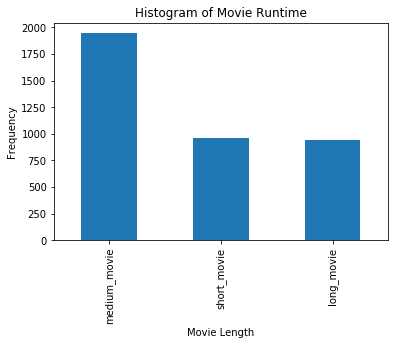

In [85]:
df.length.value_counts().plot(kind='bar');
plt.title('Histogram of Movie Runtime');
plt.xlabel("Movie Length")
plt.ylabel("Frequency")
plt.show()

We can see that most of the movies are medium length movies.

Now we are going to see what kind of movie gets the highest profit.

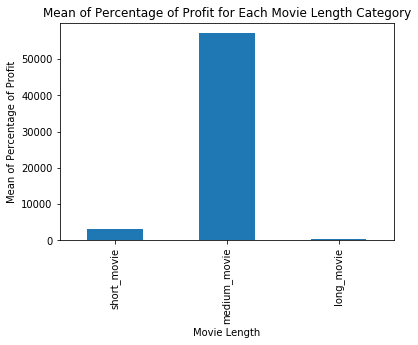

In [86]:
df.groupby('length').p_revenue.mean().plot(kind='bar');
plt.title('Mean of Percentage of Profit for Each Movie Length Category');
plt.xlabel("Movie Length")
plt.ylabel("Mean of Percentage of Profit")
plt.show()

As we can see from the bar chart it is clear that medium movies have higher chance to get the highest profit then the short movies and long movies has the least profit.

We are going to see if there is a clear relation between the budget of the movie and its profit

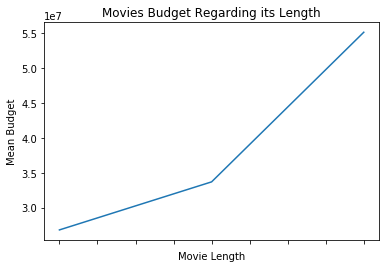

In [87]:
df.groupby('length').budget.mean().plot(kind='line', title='Movies Budget Regarding its Length')
plt.xlabel("Movie Length")
plt.ylabel("Mean Budget")
plt.show()

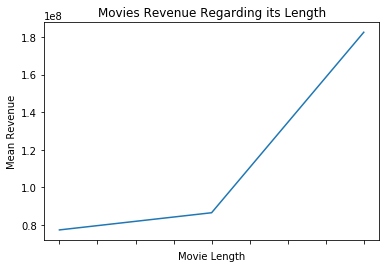

In [88]:
df.groupby('length').revenue.mean().plot(kind='line', title='Movies Revenue Regarding its Length')
plt.xlabel("Movie Length")
plt.ylabel("Mean Revenue")
plt.show()

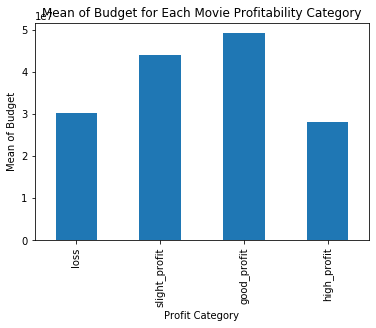

In [89]:
df.groupby('profit').budget.mean().plot(kind='bar');
plt.title('Mean of Budget for Each Movie Profitability Category');
plt.xlabel("Profit Category")
plt.ylabel("Mean of Budget")
plt.show()

It is very clear that long movies cost more than medium and short movies and they get higher revenue, but as a percentage they get the least profit.

We can say that the highest profit movies has the least budget which support our first realizition that medium and short movies which cost less than long movies has less revenue, but higher profit because of its inexpensive cost.

So, we are going to see if there is a relation between the budget of the movie and its profit 

## Limitation

Regarding the dataset, it would be better if there was a main genre for each movie to see which genre has the highest profit. Secondly, there were a lot of movies that have zero in either the budget or revenue column and that is a lot of missing values.

<a id='conclusions'></a>
## Conclusions

Finally, we can say that medium movies have the highest profit because of its good revenue and its inexpensive cost. Long movies have the highest revenue but because of its high cost they have the least profit.